<a href="https://colab.research.google.com/github/apple-pie-h/ICES-AI-bootcamp/blob/main/Matplotolib%20%26%20Seaborn/matplotlib_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Sales Data - E-commerce sales with categories and dates
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
categories = ['Electronics', 'Clothing', 'Books', 'Home & Garden', 'Sports']
sales_data = []

for date in dates:
    for category in categories:
        # Simulate seasonal patterns
        base_sales = np.random.normal(1000, 200)
        if date.month in [11, 12]:  # Holiday season
            base_sales *= 1.5
        elif date.month in [6, 7, 8]:  # Summer
            base_sales *= 1.2

        sales_data.append({
            'date': date,
            'category': category,
            'sales': max(0, base_sales + np.random.normal(0, 100)),
            'region': np.random.choice(['North', 'South', 'East', 'West'])
        })

sales_df = pd.DataFrame(sales_data)

# 2. Iris-like Dataset - Customer demographics
n_customers = 1000
customer_data = {
    'age': np.random.normal(35, 12, n_customers),
    'income': np.random.lognormal(10, 0.5, n_customers),
    'satisfaction': np.random.beta(2, 2, n_customers) * 10,
    'loyalty_score': np.random.exponential(2, n_customers),
    'segment': np.random.choice(['Premium', 'Standard', 'Basic'], n_customers, p=[0.2, 0.5, 0.3])
}
customer_df = pd.DataFrame(customer_data)

# 3. Stock Price Data - Simulated financial time series
stock_dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
stock_prices = []
price = 100

for date in stock_dates:
    # Random walk with drift
    price += np.random.normal(0.1, 2)
    price = max(price, 10)  # Floor price
    stock_prices.append({
        'date': date,
        'price': price,
        'volume': np.random.lognormal(8, 1)
    })

stock_df = pd.DataFrame(stock_prices)

# 4. Survey Data - Customer satisfaction survey
survey_data = {
    'product_quality': np.random.normal(7.5, 1.5, 500),
    'customer_service': np.random.normal(6.8, 1.8, 500),
    'price_satisfaction': np.random.normal(6.2, 2.0, 500),
    'delivery_speed': np.random.normal(7.0, 1.6, 500),
    'overall_satisfaction': np.random.normal(7.1, 1.4, 500),
    'recommendation_likelihood': np.random.normal(7.3, 1.7, 500)
}
survey_df = pd.DataFrame(survey_data)


In [8]:
sales_df.head()

,date,category,sales,region
0,2023-01-01,Electronics,1085.516400,East
1,2023-01-01,Clothing,1231.617179,South
2,2023-01-01,Books,1156.859787,West
3,2023-01-01,Home & Garden,919.892723,West
4,2023-01-01,Sports,960.361127,West


In [9]:
customer_df.head()

,age,income,satisfaction,loyalty_score,segment
0,70.557301,12921.639277,5.068781,2.640431,Basic
1,47.907890,22583.910742,2.465860,0.230169,Premium
2,45.025094,18654.128414,8.084518,2.789132,Basic
3,25.834536,37120.438408,4.832619,0.093564,Standard
4,41.297670,27767.360394,2.657332,0.451338,Standard


In [10]:
stock_df.head()

,date,price,volume
0,2023-01-01,98.063325,3925.325257
1,2023-01-02,95.693441,485.012663
2,2023-01-03,98.142733,11486.164759
3,2023-01-04,95.882693,711.953955
4,2023-01-05,94.676314,10433.826469


In [11]:
survey_df.head()

,product_quality,customer_service,price_satisfaction,delivery_speed,overall_satisfaction,recommendation_likelihood
0,7.741591,6.812408,8.269497,6.748587,5.936986,7.849201
1,5.646543,8.411788,6.009505,6.867336,8.148917,6.698353
2,10.363440,9.525001,7.402884,9.099679,7.096986,10.054312
3,6.920233,4.532561,5.673566,3.802367,6.740735,8.772403
4,6.438082,7.329289,7.183255,6.672579,5.530683,8.046430


## Assignment 1: Create a Multi-Panel Dashboard
**Objective**: Create a comprehensive dashboard showing sales analytics.

**Requirements**:
- 4 subplots in a 2x2 grid
- Include: sales over time, category distribution, regional comparison, and top performing products
- Use both Matplotlib and Seaborn
- Add proper titles, labels, and formatting

In [29]:
sales_df.head()

,date,category,sales,region
0,2023-01-01,Electronics,1085.516400,East
1,2023-01-01,Clothing,1231.617179,South
2,2023-01-01,Books,1156.859787,West
3,2023-01-01,Home & Garden,919.892723,West
4,2023-01-01,Sports,960.361127,West


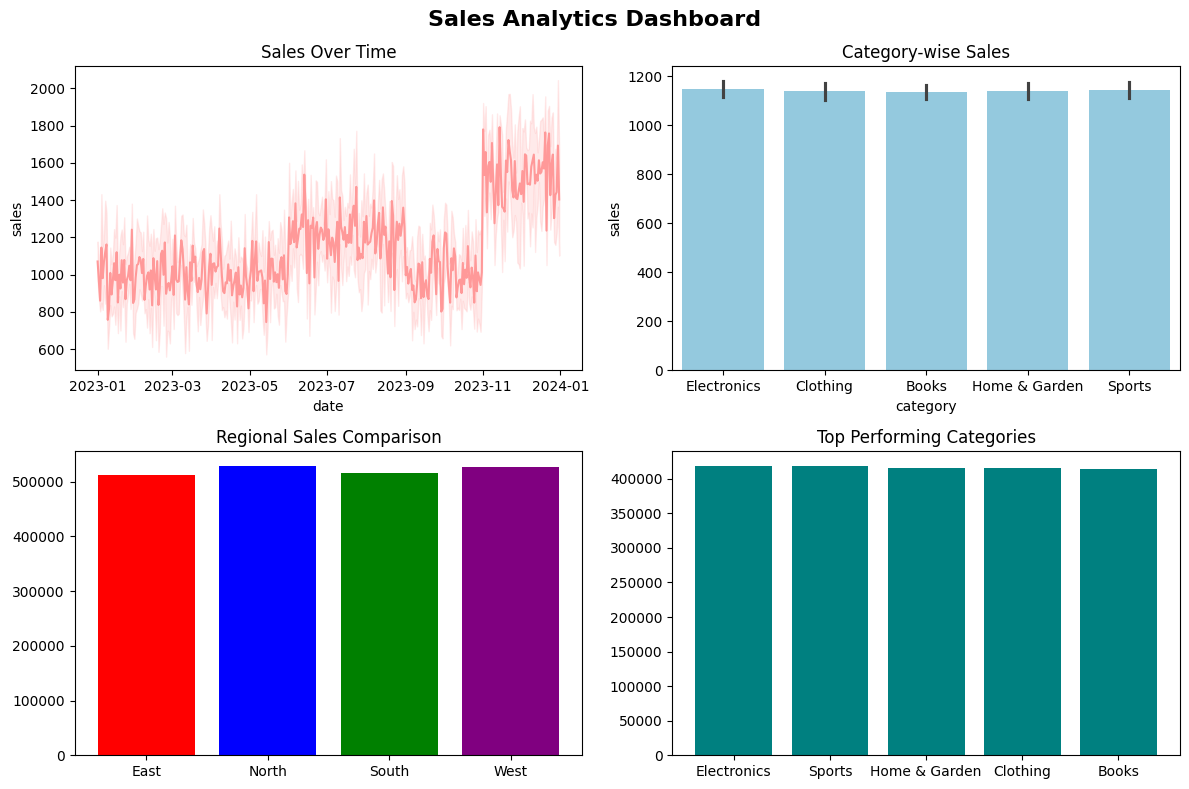

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) #creates grid of subplot
fig.suptitle("Sales Analytics Dashboard", fontsize=16, fontweight="bold")

sns.lineplot(data=sales_df, x="date", y="sales", ax=axes[0,0],color='#FF9999')
axes[0,0].set_title("Sales Over Time")

sns.barplot(data=sales_df, x="category", y="sales", ax=axes[0,1],color='skyblue')
axes[0,1].set_title("Category-wise Sales")

colors = ['red', 'blue', 'green', 'purple']

df_region = sales_df.groupby("region")["sales"].sum().reset_index()
axes[1,0].bar(df_region["region"], df_region["sales"], color =colors)
axes[1,0].set_title("Regional Sales Comparison")

top_categories = sales_df.groupby("category")["sales"].sum().nlargest(5).reset_index()
axes[1,1].bar(top_categories["category"], top_categories["sales"],color='teal')
axes[1,1].set_title("Top Performing Categories")

plt.tight_layout()
plt.show()


## Assignment 2: Statistical Analysis Visualization
**Objective**: Create a comprehensive statistical analysis of customer data.

**Requirements**:
- 9 subplots in a 3x3 grid
- Show distribution of key metrics
- Include correlation analysis
- Add statistical annotations (mean, median, etc.)
- Use appropriate color schemes



In [30]:
customer_df.head()

,age,income,satisfaction,loyalty_score,segment
0,70.557301,12921.639277,5.068781,2.640431,Basic
1,47.907890,22583.910742,2.465860,0.230169,Premium
2,45.025094,18654.128414,8.084518,2.789132,Basic
3,25.834536,37120.438408,4.832619,0.093564,Standard
4,41.297670,27767.360394,2.657332,0.451338,Standard


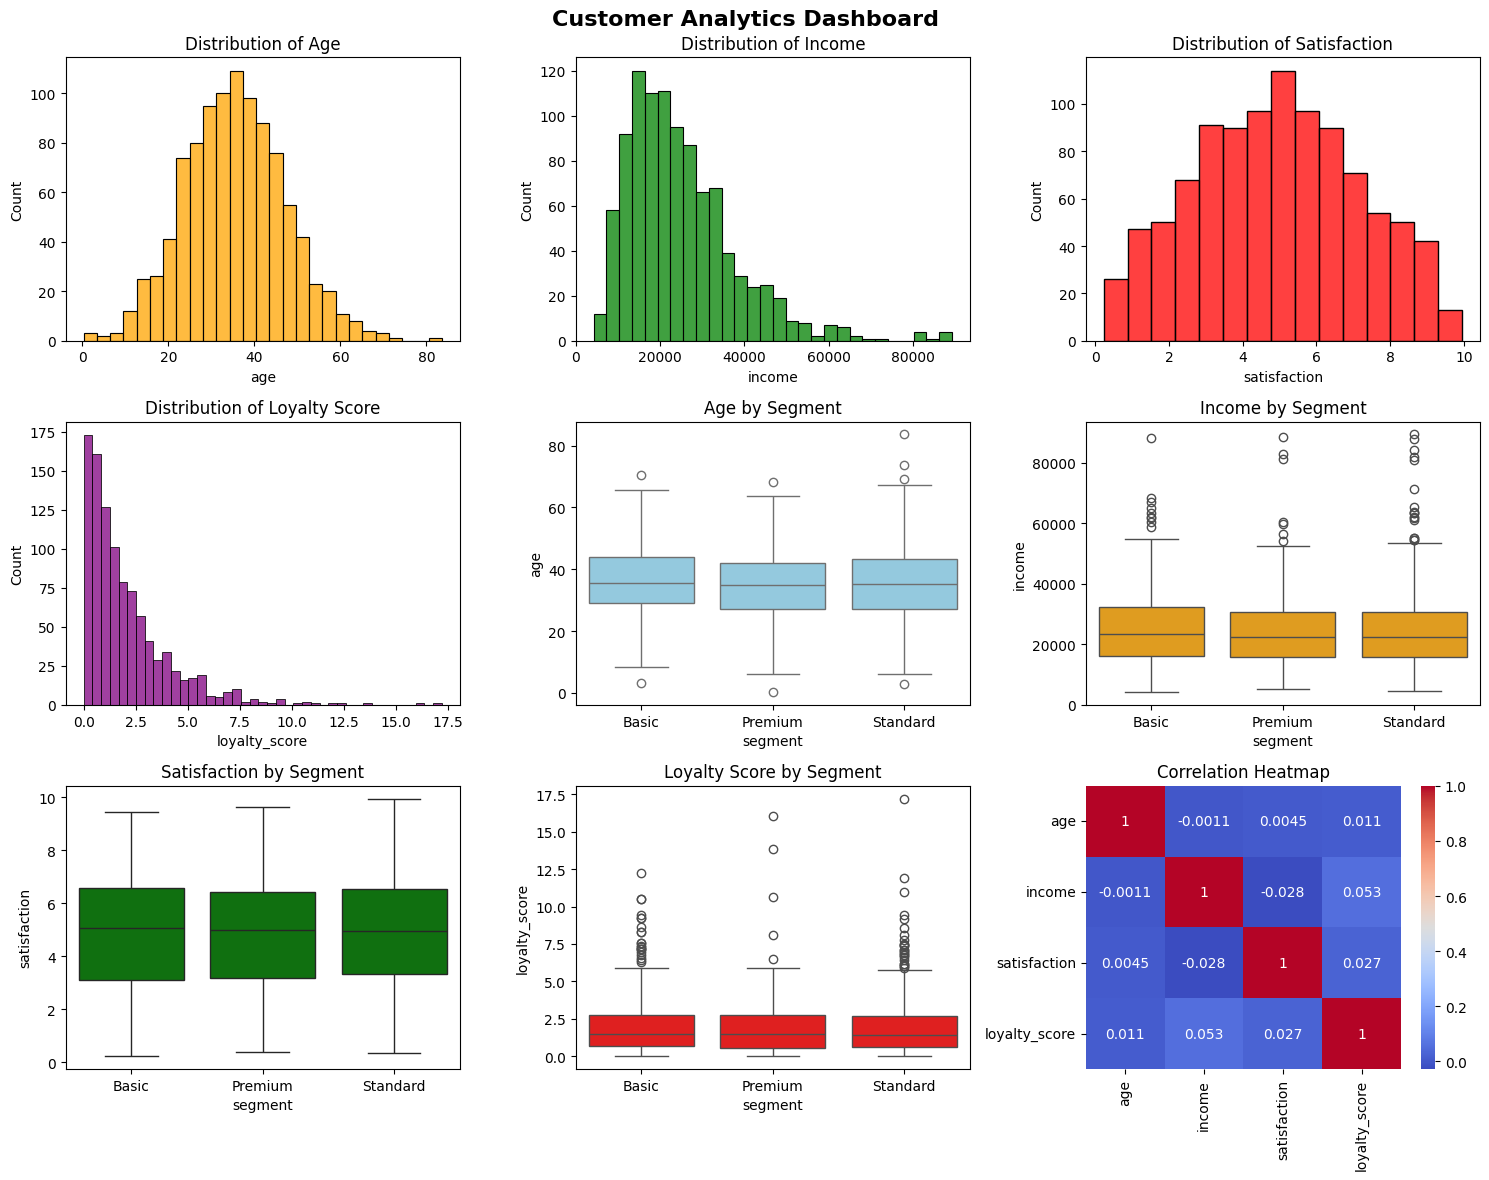

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) #creates grid of subplot
fig.suptitle("Sales Analytics Dashboard", fontsize=16, fontweight="bold")

sns.histplot(data=customer_df, x="age", ax=axes[0,0],color='orange')
axes[0,0].set_title("Distribution of Age")

sns.histplot(data=customer_df, x="income", ax=axes[0,1],color='green')
axes[0,1].set_title("Distribution of Income")

sns.histplot(data=customer_df, x="satisfaction", ax=axes[0,2],color='red')
axes[0,2].set_title("Distribution of Satisfaction")

sns.histplot(data=customer_df, x="loyalty_score", ax=axes[1,0],color='purple')
axes[1,0].set_title("Distribution of Loyalty Score")

sns.boxplot(data=customer_df, x="segment", y="age", ax=axes[1,1],color='skyblue')
axes[1,1].set_title("Age by Segment")

sns.boxplot(data=customer_df, x="segment", y="income", ax=axes[1,2],color='orange')
axes[1,2].set_title("Income by Segment")

sns.boxplot(data=customer_df, x="segment", y="satisfaction", ax=axes[2,0],color='green')
axes[2,0].set_title("Satisfaction by Segment")

sns.boxplot(data=customer_df, x="segment", y="loyalty_score", ax=axes[2,1],color='red')
axes[2,1].set_title("Loyalty Score by Segment")

sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[2,2])
axes[2,2].set_title("Correlation Heatmap")


plt.tight_layout()
plt.show()

## Assignment 3: Time Series Analysis
**Objective**: Create a comprehensive time series analysis of stock prices.

**Requirements**:
- 3 subplots in a 3x1 grid
- Show price trends over time
- Include volume analysis
- Add moving averages
- Highlight significant events


In [43]:
stock_df.head()

,date,price,volume
0,2023-01-01,98.063325,3925.325257
1,2023-01-02,95.693441,485.012663
2,2023-01-03,98.142733,11486.164759
3,2023-01-04,95.882693,711.953955
4,2023-01-05,94.676314,10433.826469


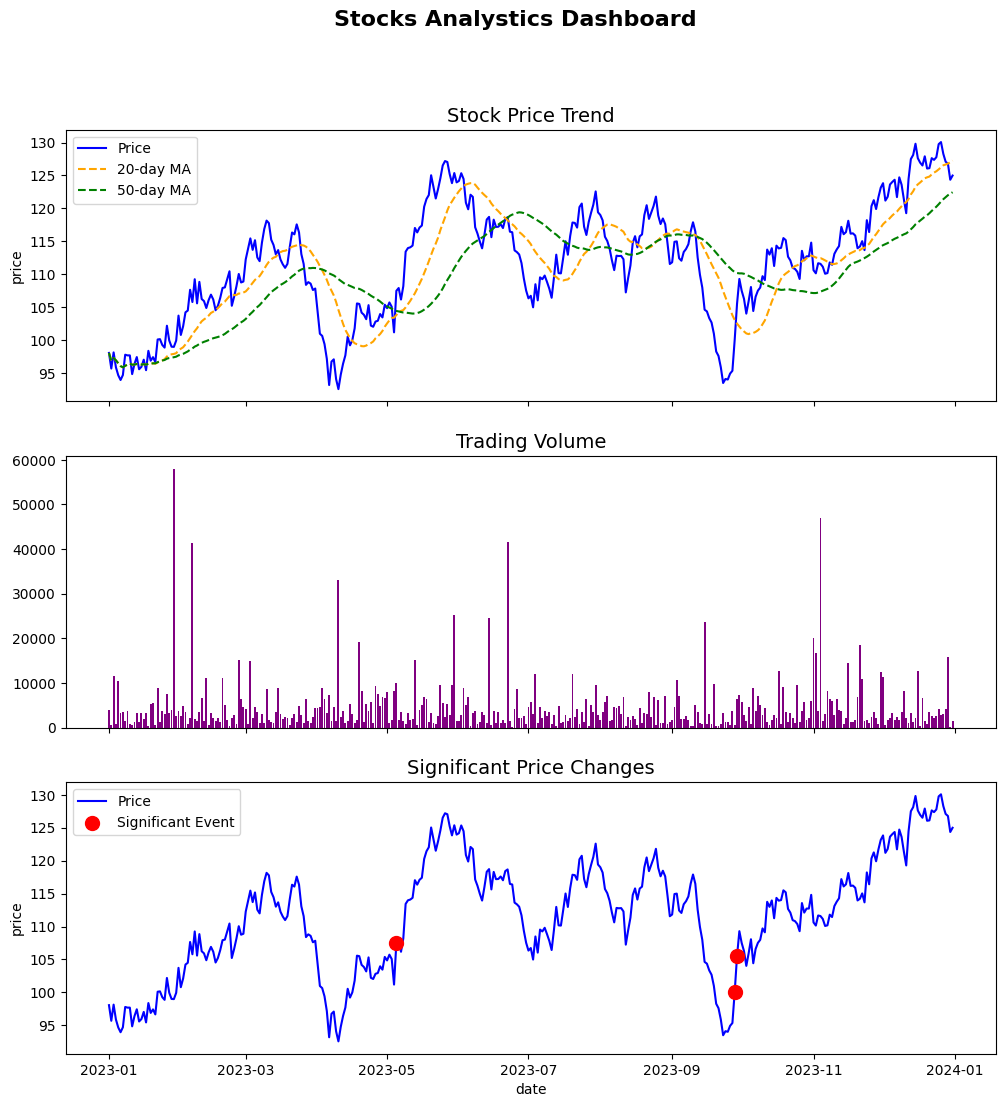

In [64]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True) #creates grid of subplot
fig.suptitle("Stocks Analystics Dashboard", fontsize=16, fontweight="bold")
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.set_index('date', inplace=True)


stock_df['MA20'] = stock_df['price'].rolling(window=20, min_periods=1).mean()
stock_df['MA50'] = stock_df['price'].rolling(window=50, min_periods=1).mean()

stock_df_reset = stock_df.reset_index()  # now 'date' is a column
sns.lineplot(ax=axes[0], data=stock_df_reset, x='date', y='price', label='Price', color='blue')
sns.lineplot(ax=axes[0], data=stock_df_reset, x='date', y='MA20', label='20-day MA', color='orange', linestyle='--')
sns.lineplot(ax=axes[0], data=stock_df_reset, x='date', y='MA50', label='50-day MA', color='green', linestyle='--')

axes[0].set_title('Stock Price Trend', fontsize=14)
axes[0].legend()

axes[1].bar(stock_df.index, stock_df['volume'], color='purple')
axes[1].set_title('Trading Volume', fontsize=14)

sns.lineplot(ax=axes[2], data=stock_df, x=stock_df.index, y='price', label='Price', color='blue')
# Highlight events
# Calculate daily percent change
stock_df['Price_Change'] = stock_df['price'].pct_change()

# Define an event as a day when price change exceeds 5%
stock_df['Event'] = stock_df['Price_Change'].abs() > 0.05

events = stock_df[stock_df['Event']]
axes[2].scatter(events.index, events['price'], color='red', s=100, label='Significant Event', zorder=5)
axes[2].set_title('Significant Price Changes', fontsize=14)
axes[2].legend()
